In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.io.parsers.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [3]:
from sklearn.model_selection import train_test_split

_, _, train, test = train_test_split(df[['Alcohol', 'Malic acid']], df.index.values, test_size=0.2, random_state=42, stratify=df['Class label'])

df_train = df.iloc[train,:]
df_test = df.iloc[test,:]

---
<h1>Feature Scaling</h1>
<img src="../../images/scaling.png" style="background:white; display: block; margin-left: auto;margin-right: auto; width:50%"/>
<p>Machine learning is like making a mixed fruit juice. If we want to get the best-mixed juice, we need to mix all fruit not by their size but based on their right proportion. Feature scaling can vary our results a lot while using certain algorithms and have a minimal or no effect in others.</p>
<p>
    <ul>
        <li><strong>WHAT</strong><ul>
                <li>It refers to putting the values in the same range or same scale so that no variable is dominated by the other
            </ul>
        <li><strong>WHY</strong><ul>
                <li>Machine learning algorithm just sees number, if there is a vast difference in the range say few ranging in thousands and few ranging in the tens, and it makes the underlying assumption that higher ranging numbers have superiority of some sort
                <li>Most of the times, our dataset will contain features highly varying in magnitudes, units and range , but since, most of the machine learning algorithms use Eucledian distance between two data points in their computations, this is a problem
                <li>To supress this effect, we need to bring all features to the same level of magnitudes and this can be acheived by scaling
                <li>Another reason why feature scaling is applied is that few algorithms like Neural network gradient descent converge much faster with feature scaling than without it
                <li>Scaling can make a difference between a weak machine learning model and a better one
            </ul>
        <li><strong>HOW</strong><ul>
                <li><strong>MinMax</strong><ul>
                        <li>This Scaler shrinks the data within the range of -1 to 1 if there are negative values
                        <li>This Scaler responds well if the standard deviation is small and when a distribution is not Gaussian
                        <li>This Scaler is sensitive to outliers
                    </ul>
                <li><strong>Standard (or Z-score normalization)</strong><ul>
                        <li>The Standard Scaler assumes data is normally distributed
                        <li>the distribution centered around 0, with a standard deviation of 1
                        <li>If data is not normally distributed, this is not the best Scaler to use
                    </ul>
                <li><strong>MaxAbs</strong><ul>
                        <li>This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set is 1.0
                        <li>On positive-only data, this Scaler behaves similarly to Min Max Scaler and, therefore, also suffers from the presence of significant outliers
                    </ul>
                <li><strong>Robust</strong><ul>
                        <li>This Scaler is robust to outliers
                        <li>This Scaler removes the median and scales the data according to the quantile range
                    </ul>
                <li><strong>Quantile Transformer</strong><ul>
                        <li>This method transforms the features to follow a uniform or a normal distribution
                        <li>This transformation tends to spread out the most frequent values and also reduces the impact of (marginal) outliers
                        <li>Quantile transformer is useful when we have a large dataset with many data points usually more than 1000
                    </ul>
                <li><strong>Power Transformer</strong><ul>
                        <li>This is useful for modeling issues related to the variability of a variable that is unequal across the range (heteroscedasticity) or situations where normality is desired
                    </ul>
                <li><strong>Unit Vector</strong><ul>
                        <li>This technique produces values of range [0,1]
                        <li>When dealing with features with hard boundaries, this is quite useful
                    </ul>
            </ul>
        <li><strong>WHEN</strong><ul>
                <li>Rule of thumb is any algorithm that computes distance or assumes normality, <strong>scale our features!!!</strong>
                <li>CART, Random Forests, Gradient Boosted Decision Trees are the algorithms that utilize rules (series of inequalities) and <strong>do not require normalization</strong>
                <li>Some examples of algorithms where feature scaling matters are:<ul>
                    <li><strong>KNN</strong> — with an Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features to weigh in equally
                    <li><strong>K-Means</strong> — uses the Euclidean distance measure here feature scaling matters
                    <li><strong>PCA</strong> — PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and skews the PCA towards high magnitude features
                    <li><strong>Gradient Descent</strong> — We can speed up gradient descent by scaling because θ descends quickly on small ranges and slowly on large ranges, and oscillates inefficiently down to the optimum when the variables are very uneven
                </ul>
            </ul>
    </ul>
    <h3>Important note: Always do feature scaling after splitting the data set not before!!</h3>
</p>

---
<h2>1. Min-Max Scaler</h2>

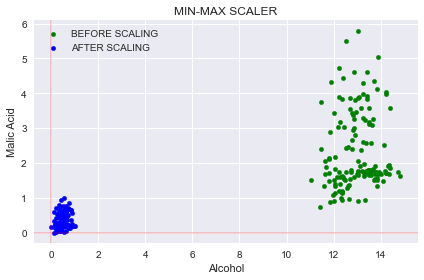

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_fit = scaler.fit(df_train[['Alcohol', 'Malic acid']])
df_train_scale = pd.DataFrame(scaler_fit.transform(df_train[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])
df_test_scale = pd.DataFrame(scaler_fit.transform(df_test[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])

# Visualize
plt.figure(figsize=(6,4), facecolor='w')
plt.scatter(df_train['Alcohol'], df_train['Malic acid'], color='g', s=20, label='BEFORE SCALING')
plt.scatter(df_train_scale['Alcohol'], df_train_scale['Malic acid'], color='b', s=20, label='AFTER SCALING')
plt.title('MIN-MAX SCALER')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

---
<h2>2. Standard Scaler</h2>

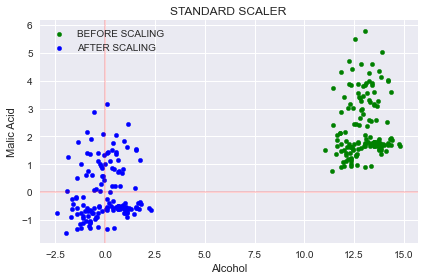

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_fit = scaler.fit(df_train[['Alcohol', 'Malic acid']])
df_train_scale = pd.DataFrame(scaler_fit.transform(df_train[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])
df_test_scale = pd.DataFrame(scaler_fit.transform(df_test[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])

# Visualize
plt.figure(figsize=(6,4), facecolor='w')
plt.scatter(df_train['Alcohol'], df_train['Malic acid'], color='g', s=20, label='BEFORE SCALING')
plt.scatter(df_train_scale['Alcohol'], df_train_scale['Malic acid'], color='b', s=20, label='AFTER SCALING')
plt.title('STANDARD SCALER')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

---
<h2>3. MaxAbs Scaler</h2>

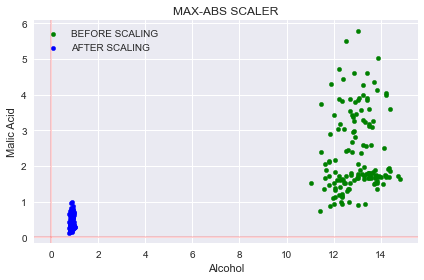

In [6]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaler_fit = scaler.fit(df_train[['Alcohol', 'Malic acid']])
df_train_scale = pd.DataFrame(scaler_fit.transform(df_train[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])
df_test_scale = pd.DataFrame(scaler_fit.transform(df_test[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])

# Visualize
plt.figure(figsize=(6,4), facecolor='w')
plt.scatter(df_train['Alcohol'], df_train['Malic acid'], color='g', s=20, label='BEFORE SCALING')
plt.scatter(df_train_scale['Alcohol'], df_train_scale['Malic acid'], color='b', s=20, label='AFTER SCALING')
plt.title('MAX-ABS SCALER')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

---
<h2>4. Robust Scaler</h2>

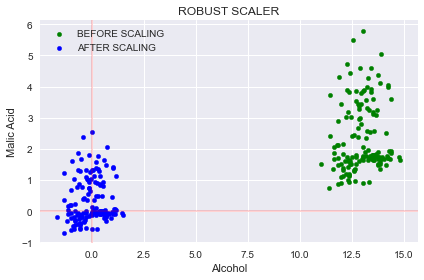

In [7]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler_fit = scaler.fit(df_train[['Alcohol', 'Malic acid']])
df_train_scale = pd.DataFrame(scaler_fit.transform(df_train[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])
df_test_scale = pd.DataFrame(scaler_fit.transform(df_test[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])

# Visualize
plt.figure(figsize=(6,4), facecolor='w')
plt.scatter(df_train['Alcohol'], df_train['Malic acid'], color='g', s=20, label='BEFORE SCALING')
plt.scatter(df_train_scale['Alcohol'], df_train_scale['Malic acid'], color='b', s=20, label='AFTER SCALING')
plt.title('ROBUST SCALER')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

---
<h2>5. Quantile Transformer Scaler</h2>

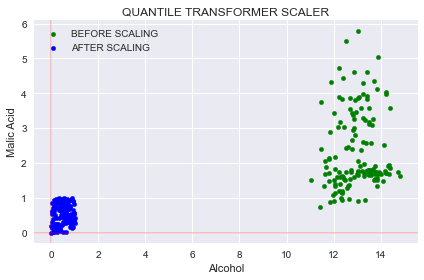

In [8]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()
scaler_fit = scaler.fit(df_train[['Alcohol', 'Malic acid']])
df_train_scale = pd.DataFrame(scaler_fit.transform(df_train[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])
df_test_scale = pd.DataFrame(scaler_fit.transform(df_test[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])

# Visualize
plt.figure(figsize=(6,4), facecolor='w')
plt.scatter(df_train['Alcohol'], df_train['Malic acid'], color='g', s=20, label='BEFORE SCALING')
plt.scatter(df_train_scale['Alcohol'], df_train_scale['Malic acid'], color='b', s=20, label='AFTER SCALING')
plt.title('QUANTILE TRANSFORMER SCALER')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

---
<h2>6. Power Transformer Scaler</h2>

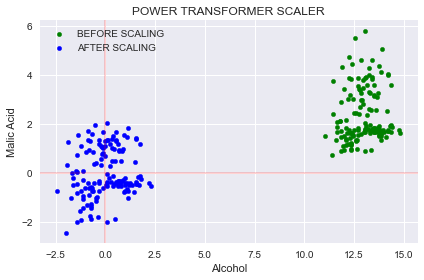

In [9]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
scaler_fit = scaler.fit(df_train[['Alcohol', 'Malic acid']])
df_train_scale = pd.DataFrame(scaler_fit.transform(df_train[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])
df_test_scale = pd.DataFrame(scaler_fit.transform(df_test[['Alcohol', 'Malic acid']]), columns=['Alcohol', 'Malic acid'])

# Visualize
plt.figure(figsize=(6,4), facecolor='w')
plt.scatter(df_train['Alcohol'], df_train['Malic acid'], color='g', s=20, label='BEFORE SCALING')
plt.scatter(df_train_scale['Alcohol'], df_train_scale['Malic acid'], color='b', s=20, label='AFTER SCALING')
plt.title('POWER TRANSFORMER SCALER')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend(loc='upper left')
plt.tight_layout()
plt.axhline(0, color='red',alpha=0.2)
plt.axvline(0, color='red',alpha=0.2)
plt.show()

---
<h2>7. Unit Vector Scaler</h2>

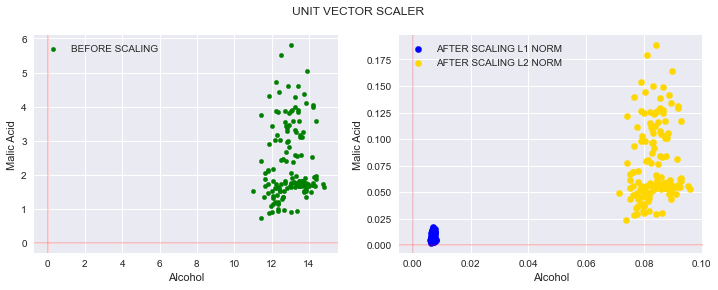

In [10]:
df_train_scale_l1 = df_train[['Alcohol', 'Malic acid']].apply(lambda x : x/np.linalg.norm(x,1))
df_train_scale_l2 = df_train[['Alcohol', 'Malic acid']].apply(lambda x : x/np.linalg.norm(x,2))

# Visualize
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
ax[0].scatter(df_train['Alcohol'], df_train['Malic acid'], color='g', s=20, label='BEFORE SCALING')
ax[1].scatter(df_train_scale_l1['Alcohol'], df_train_scale_l1['Malic acid'], color='b', s=40, label='AFTER SCALING L1 NORM')
ax[1].scatter(df_train_scale_l2['Alcohol'], df_train_scale_l2['Malic acid'], color='gold', s=40, label='AFTER SCALING L2 NORM')
plt.suptitle('UNIT VECTOR SCALER')

for i in range(2):
    ax[i].set_xlabel('Alcohol')
    ax[i].set_ylabel('Malic Acid')
    ax[i].legend(loc='upper left')
    ax[i].axhline(0, color='red',alpha=0.2)
    ax[i].axvline(0, color='red',alpha=0.2)
plt.show()